In [38]:
import pandas as pd
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('polarity2.csv')
data = data[['Text', 'polarity_score', 'sentimen']]
data

,Text,polarity_score,sentimen
0,serius tanya stb kalau gabisa dipake tu kenapa...,-16,Negatif
1,kominfo bentuk satgas kecil kendali harga stb ...,7,Positif
2,kominfo sinergi bentuk satgas kecil kendali ha...,4,Positif
3,masyarakat tahu stb gratis bagi untuk masyarak...,-10,Negatif
4,stb gratis bagi siap syarat login link cek pen...,-1,Negatif
...,...,...,...
978,semua rajin diving mentab auto jebol stb hyper...,0,Positif
979,refresh modem refresh stb nya ubah bagaimana,4,Positif
980,kagak dibeliin stb,-4,Negatif
981,kata apa blithedose stb tema rumah sakit jiwa ...,-9,Negatif


In [40]:
data.sentimen.value_counts()

Negatif    545
Positif    438
Name: sentimen, dtype: int64

In [41]:
# Tokenisasi dan pengkodean teks
max_words = 1000  # Jumlah kata yang akan diikutsertakan dalam kamus
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['Text'])
sequences = tokenizer.texts_to_sequences(data['Text'])
x_data = pad_sequences(sequences)

In [42]:
# Label encoding untuk sentimen
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(data['sentimen'])

In [43]:
# Membangun model CNN
def build_model():
    model = models.Sequential()
    model.add(layers.Embedding(max_words, 128, input_length=x_data.shape[1]))
    model.add(layers.Conv1D(64, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/5
221/221 - 2s - loss: 0.6285 - accuracy: 0.6369 - val_loss: 0.4664 - val_accuracy: 0.7980 - 2s/epoch - 11ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3223 - accuracy: 0.8620 - val_loss: 0.4312 - val_accuracy: 0.7879 - 943ms/epoch - 4ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1211 - accuracy: 0.9559 - val_loss: 0.4459 - val_accuracy: 0.8485 - 1s/epoch - 5ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0581 - accuracy: 0.9796 - val_loss: 0.5656 - val_accuracy: 0.8182 - 1s/epoch - 5ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0280 - accuracy: 0.9898 - val_loss: 0.6851 - val_accuracy: 0.8182 - 1s/epoch - 5ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.80      0.89      0.84        54
     Positif       0.85      0.73      0.79        45

    accuracy                           0.82        99
   macro avg       0.82      0.81      0.81        99
weighted avg       0.82      0.82      0.82        99



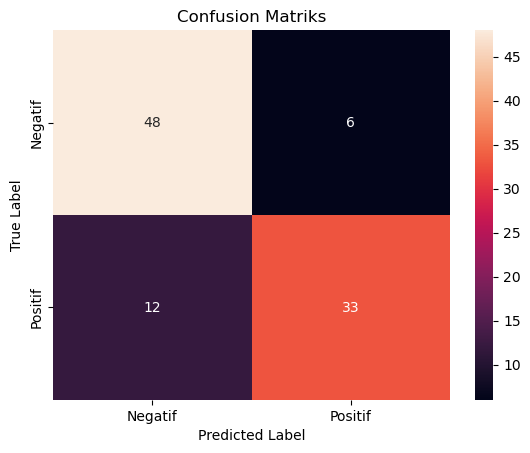

Epoch 1/5
221/221 - 2s - loss: 0.6230 - accuracy: 0.6448 - val_loss: 0.4815 - val_accuracy: 0.7475 - 2s/epoch - 10ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3240 - accuracy: 0.8609 - val_loss: 0.3916 - val_accuracy: 0.8182 - 938ms/epoch - 4ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1248 - accuracy: 0.9581 - val_loss: 0.5031 - val_accuracy: 0.8485 - 1s/epoch - 5ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.5836 - val_accuracy: 0.8283 - 974ms/epoch - 4ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.6539 - val_accuracy: 0.8081 - 978ms/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.87      0.79      0.83        57
     Positif       0.74      0.83      0.79        42

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



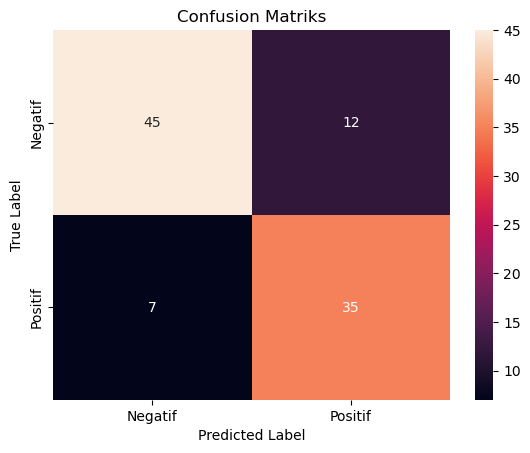

Epoch 1/5
221/221 - 3s - loss: 0.5974 - accuracy: 0.6674 - val_loss: 0.5285 - val_accuracy: 0.7778 - 3s/epoch - 12ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3045 - accuracy: 0.8744 - val_loss: 0.4767 - val_accuracy: 0.8081 - 1s/epoch - 5ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1258 - accuracy: 0.9627 - val_loss: 0.5085 - val_accuracy: 0.8485 - 1s/epoch - 5ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0490 - accuracy: 0.9864 - val_loss: 0.5410 - val_accuracy: 0.8485 - 1s/epoch - 5ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0418 - accuracy: 0.9864 - val_loss: 0.5544 - val_accuracy: 0.8485 - 1s/epoch - 5ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84        46
     Positif       0.87      0.85      0.86        53

    accuracy                           0.85        99
   macro avg       0.85      0.85      0.85        99
weighted avg       0.85      0.85      0.85        99



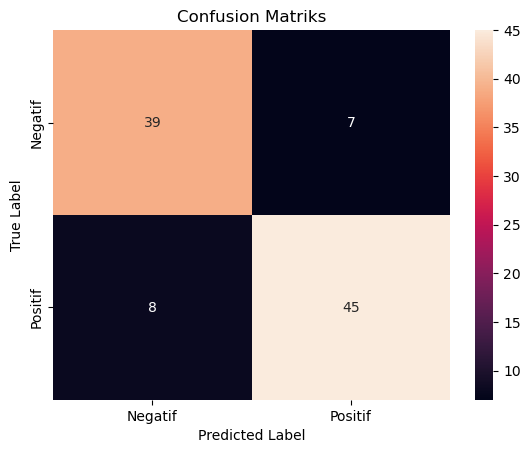

Epoch 1/5
221/221 - 2s - loss: 0.6092 - accuracy: 0.6335 - val_loss: 0.4814 - val_accuracy: 0.7879 - 2s/epoch - 11ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3193 - accuracy: 0.8676 - val_loss: 0.3852 - val_accuracy: 0.8384 - 1s/epoch - 5ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1264 - accuracy: 0.9525 - val_loss: 0.4910 - val_accuracy: 0.8081 - 996ms/epoch - 5ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0602 - accuracy: 0.9774 - val_loss: 0.6220 - val_accuracy: 0.7879 - 1s/epoch - 5ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0366 - accuracy: 0.9853 - val_loss: 0.6852 - val_accuracy: 0.8182 - 1s/epoch - 5ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.85      0.78      0.81        50
     Positif       0.79      0.86      0.82        49

    accuracy                           0.82        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.82      0.82      0.82        99



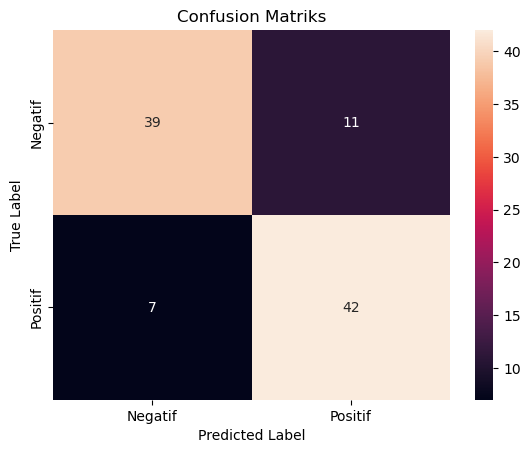

Epoch 1/5
221/221 - 2s - loss: 0.6159 - accuracy: 0.6437 - val_loss: 0.4522 - val_accuracy: 0.8384 - 2s/epoch - 10ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3222 - accuracy: 0.8518 - val_loss: 0.4225 - val_accuracy: 0.7778 - 1s/epoch - 5ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1162 - accuracy: 0.9661 - val_loss: 0.4422 - val_accuracy: 0.8384 - 984ms/epoch - 4ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0663 - accuracy: 0.9740 - val_loss: 0.5574 - val_accuracy: 0.8283 - 1s/epoch - 5ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.5256 - val_accuracy: 0.8283 - 986ms/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.80      0.95      0.87        58
     Positif       0.90      0.66      0.76        41

    accuracy                           0.83        99
   macro avg       0.85      0.80      0.81        99
weighted avg       0.84      0.83      0.82        99



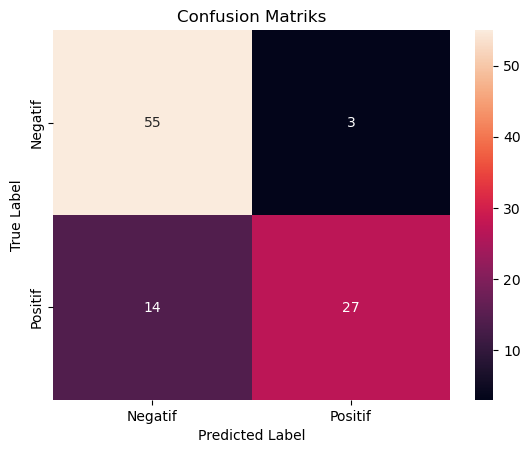

Epoch 1/5
221/221 - 2s - loss: 0.6065 - accuracy: 0.6629 - val_loss: 0.5427 - val_accuracy: 0.6465 - 2s/epoch - 10ms/step
Epoch 2/5
221/221 - 1s - loss: 0.2796 - accuracy: 0.8846 - val_loss: 0.6129 - val_accuracy: 0.7273 - 944ms/epoch - 4ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1107 - accuracy: 0.9604 - val_loss: 0.7263 - val_accuracy: 0.6869 - 966ms/epoch - 4ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0531 - accuracy: 0.9808 - val_loss: 0.9103 - val_accuracy: 0.6970 - 927ms/epoch - 4ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0369 - accuracy: 0.9876 - val_loss: 1.0296 - val_accuracy: 0.7071 - 956ms/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.82      0.59      0.69        54
     Positif       0.63      0.84      0.72        45

    accuracy                           0.71        99
   macro avg       0.73      0.72      0.71        99
weighted avg       0.74      0.71      0.70        99



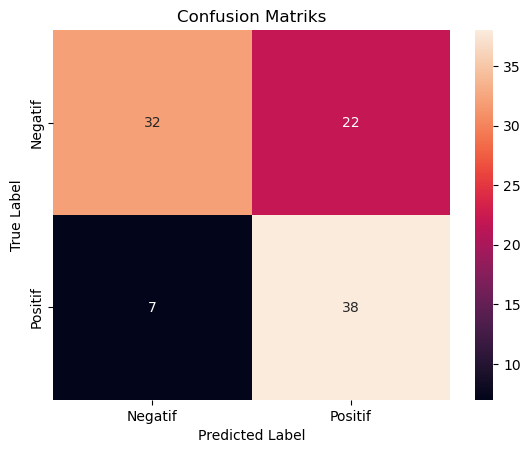

Epoch 1/5
221/221 - 2s - loss: 0.6111 - accuracy: 0.6335 - val_loss: 0.5020 - val_accuracy: 0.7879 - 2s/epoch - 10ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3180 - accuracy: 0.8563 - val_loss: 0.4267 - val_accuracy: 0.7879 - 929ms/epoch - 4ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1166 - accuracy: 0.9661 - val_loss: 0.5610 - val_accuracy: 0.8384 - 909ms/epoch - 4ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0589 - accuracy: 0.9796 - val_loss: 0.6343 - val_accuracy: 0.8283 - 934ms/epoch - 4ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0391 - accuracy: 0.9842 - val_loss: 0.7417 - val_accuracy: 0.7879 - 975ms/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.78      0.85      0.81        53
     Positif       0.80      0.72      0.76        46

    accuracy                           0.79        99
   macro avg       0.79      0.78      0.78        99
weighted avg       0.79      0.79      0.79        99



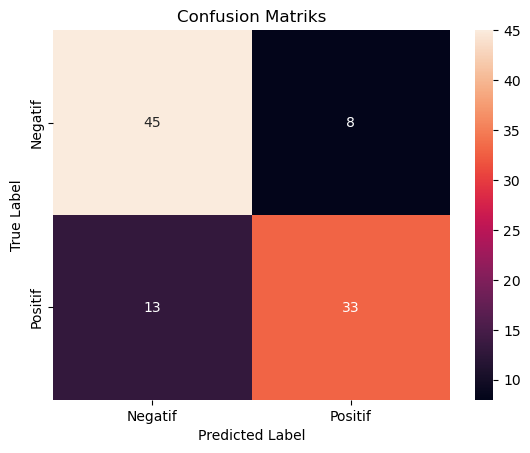

Epoch 1/5
221/221 - 2s - loss: 0.6076 - accuracy: 0.6731 - val_loss: 0.5147 - val_accuracy: 0.6970 - 2s/epoch - 11ms/step
Epoch 2/5
221/221 - 1s - loss: 0.2983 - accuracy: 0.8846 - val_loss: 0.5822 - val_accuracy: 0.7475 - 954ms/epoch - 4ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1223 - accuracy: 0.9525 - val_loss: 0.5564 - val_accuracy: 0.7677 - 983ms/epoch - 4ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0492 - accuracy: 0.9864 - val_loss: 0.7280 - val_accuracy: 0.7374 - 1s/epoch - 5ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0337 - accuracy: 0.9921 - val_loss: 0.7952 - val_accuracy: 0.7374 - 969ms/epoch - 4ms/step
4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Negatif       0.79      0.74      0.76        57
     Positif       0.67      0.74      0.70        42

    accuracy                           0.74        99
   macro avg       0.73      0.74      0.73        99
weighted avg       0.74      0.74      0.74        99



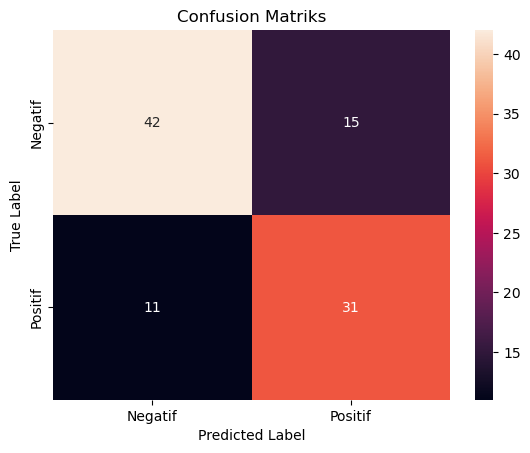

Epoch 1/5
221/221 - 2s - loss: 0.6133 - accuracy: 0.6482 - val_loss: 0.5112 - val_accuracy: 0.6869 - 2s/epoch - 10ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3122 - accuracy: 0.8688 - val_loss: 0.4160 - val_accuracy: 0.8283 - 913ms/epoch - 4ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1241 - accuracy: 0.9548 - val_loss: 0.5195 - val_accuracy: 0.7374 - 907ms/epoch - 4ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0578 - accuracy: 0.9796 - val_loss: 0.5916 - val_accuracy: 0.7677 - 986ms/epoch - 4ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0355 - accuracy: 0.9864 - val_loss: 0.6150 - val_accuracy: 0.7778 - 985ms/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.77      0.86      0.81        56
     Positif       0.78      0.67      0.72        43

    accuracy                           0.78        99
   macro avg       0.78      0.77      0.77        99
weighted avg       0.78      0.78      0.78        99



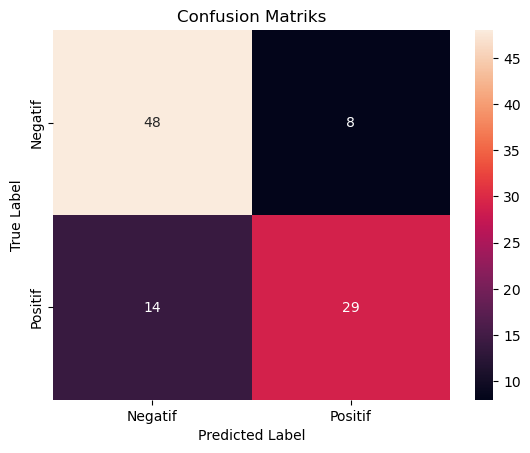

Epoch 1/5
221/221 - 3s - loss: 0.6097 - accuracy: 0.6629 - val_loss: 0.4602 - val_accuracy: 0.7778 - 3s/epoch - 13ms/step
Epoch 2/5
221/221 - 1s - loss: 0.3049 - accuracy: 0.8722 - val_loss: 0.4208 - val_accuracy: 0.7980 - 1s/epoch - 5ms/step
Epoch 3/5
221/221 - 1s - loss: 0.1071 - accuracy: 0.9604 - val_loss: 0.5489 - val_accuracy: 0.7879 - 1s/epoch - 5ms/step
Epoch 4/5
221/221 - 1s - loss: 0.0540 - accuracy: 0.9819 - val_loss: 0.6072 - val_accuracy: 0.7778 - 1s/epoch - 5ms/step
Epoch 5/5
221/221 - 1s - loss: 0.0400 - accuracy: 0.9853 - val_loss: 0.7073 - val_accuracy: 0.7677 - 1s/epoch - 5ms/step
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.71      0.85      0.77        46
     Positif       0.84      0.70      0.76        53

    accuracy                           0.77        99
   macro avg       0.78      0.77      0.77        99
weighted avg       0.78      0.77      0.77        99



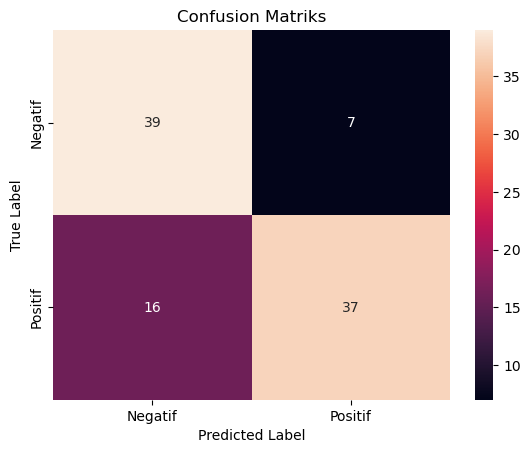

In [44]:
# Melakukan cross-validation
# Cross-validation menggunakan Shufflesplit
ss = ShuffleSplit(n_splits=10)
cv_accuracies = []
conf_matrices = []
cv_f1_scores = []
cv_recall_scores = []
cv_precision_scores = []
cv_support = []
for train_index, test_index in ss.split(x_data, y_data):
    x_train, x_val = x_data[train_index], x_data[test_index]
    y_train, y_val = y_data[train_index], y_data[test_index]
    model = build_model()
    model.fit(x_train, y_train, epochs=5, batch_size=4, verbose=2, validation_data=(x_val, y_val))
    y_pred = model.predict(x_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    # Accuracy
    accuracy = accuracy_score(y_val, y_pred_binary)
    cv_accuracies.append(accuracy)
    # F1 Score
    f1 = f1_score(y_val, y_pred_binary)
    cv_f1_scores.append(f1)
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_pred_binary)
    conf_matrices.append(conf_matrix)
    # Classification Report
    report = classification_report(y_val, y_pred_binary, target_names=label_encoder.classes_, output_dict=True)
    cv_recall_scores.append(report['macro avg']['recall'])
    cv_precision_scores.append(report['macro avg']['precision'])
    cv_support.append(report['macro avg']['support'])
    # Menampilkan rata-rata Classification Report
    average_report = classification_report(y_val, y_pred_binary, target_names=label_encoder.classes_, output_dict=True)
    print(classification_report(y_val, y_pred_binary, target_names=label_encoder.classes_))
   # Visualize the average confusion matrix using Seaborn's heatmap
    class_label = ["Negatif", "Positif"]
    df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred_binary), index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matriks")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()